# KUKA IIWA-14 Controller

<img src="kuka_config.png" width="600px" >

**Importing Required Libraries**

In [22]:
#setup nice plotting
%matplotlib widget
import time
import numpy as np
import pinocchio
import os
import meshcat
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy
from helper import Trajectory, move_joints_position, move_trajectory, forward_kinematics_KUKA, translate, rotateX, rotateY, rotateZ, get_error, inverse_kinematics, reset
np.set_printoptions(suppress=True, precision=4) # we don't want to print every decimal!

**Setting up environment and simulation**

In [23]:
package_dirs = './urdf/'
urdf_file = 'iiwa.urdf'
END_EFF_FRAME_ID = 17 # number of the frame corresponding to the end-effector
urdf = package_dirs + urdf_file
robot = pinocchio.RobotWrapper.BuildFromURDF(urdf, package_dirs)

viz = pinocchio.visualize.MeshcatVisualizer(robot.model, robot.collision_model, robot.visual_model)
try:
    viz.initViewer(open=True)
except ImportError as err:
    print("Error while initializing the viewer. It seems you should install Python meshcat")
    print(err)
    sys.exit(0)
viz.loadViewerModel()
q = pinocchio.neutral(robot.model)
viz.display(q) 

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7003/static/


**Sample Trajectory**

In [24]:
from_q = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1])
to_q = 15*np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1])

trajectory = Trajectory(from_q=from_q, to_q=to_q, total_time=2.0)
move_trajectory(viz,frequency=100.0,trajectory=trajectory)

**Target Placement**

In [25]:
viz.viewer['ball'].set_object(meshcat.geometry.Sphere(0.065), 
                              meshcat.geometry.MeshLambertMaterial(
                             color=0xff22dd,
                             reflectivity=0.8))
des_pos = np.array([0.5, 0.5, 0.5])
viz.viewer['ball'].set_transform(meshcat.transformations.translation_matrix(des_pos))

In [26]:
reset(viz)

In [27]:
q, error = inverse_kinematics(des_pos,None)
move_joints_position(viz,q)

In [34]:

initial_q = to_q
compute_time = []
error = []
bounds = np.array([[-168, 168], [-118, 118], [-168, 168], [-118, 118], [-168, 168], [-118, 118], [-172, 172]])

for i in range(1000):
    random_joint_angles = np.random.uniform(bounds[:, 0], bounds[:, 1])
    desired_pos = forward_kinematics_KUKA(random_joint_angles)[0:3,3]
    start_time = time.time()
    to_q, dist = inverse_kinematics(desired_pos,None)
    end_time = time.time()
    move_joints_position(viz,to_q)
    compute_time.append(end_time-start_time)
    error.append(dist)
    print(dist)
compute_time = np.array(compute_time)
error = np.array(error)


3.152527731945678e-11
1.394807370907579e-13
1.4155911086105786e-10
2.737476738514399e-12
1.6152327477118782e-11
1.3808943154488116e-10
2.8587555935544012e-11
3.272105470348708e-11
2.8283846220143588e-11
1.8058313278979439e-10
3.160313480268567e-13
1.4179081954739822e-11
7.940244198403558e-12
1.9581392657236062e-10
3.489614361842778e-11
1.3066457549369605e-13
5.404290129269095e-13
2.203517915947764e-12
1.852039208446411e-13
8.167024283354557e-10
2.788264335728084e-12
8.074334484864023e-17
2.6768854232366306e-13
1.0739942277731132e-10
4.30603366761695e-10
1.6635164000704631e-12
1.2769974755278898e-10
1.6422133699895896e-12
1.9426871080042808e-11
2.676011153860611e-11
2.6246066442799257e-10
3.901451055427192e-12
1.0084399715689374e-10
1.6348512923175338e-10
1.277752892867952e-11
6.989296186606263e-13
1.6260843731970607e-10
1.2670660170734222e-10
1.6436200454862244e-11
1.6745330902241074e-11
7.860899591156567e-12
1.908310985023471e-11
6.277033419452967e-11
8.26221456253586e-11
7.0759377365

In [36]:
x = np.arange(1,1001)

Text(0.5, 0, 'trajectory time stamp (ms)')

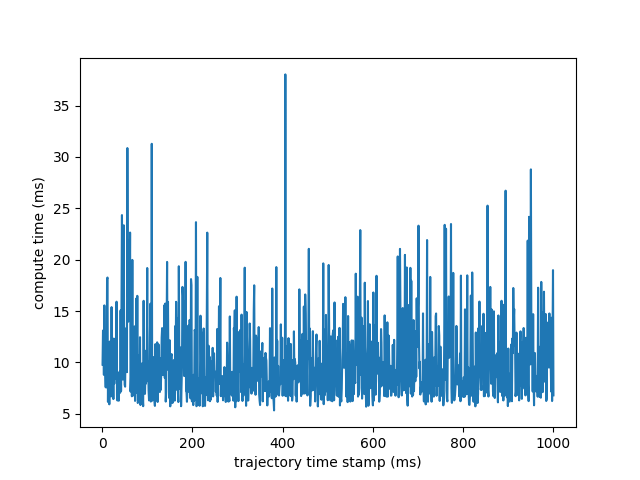

In [38]:
plt.figure()
plt.plot(x,1000*y)
plt.ylabel("compute time (ms)")
plt.xlabel("trajectory time stamp (ms)")

In [40]:
np.mean(compute_time*1000)

10.566225051879883